# Forward UXO Simulation Demo

In [1]:
import forward_simulation
import numpy as np
import matplotlib.pyplot as plt

### Example usage and plot of the data

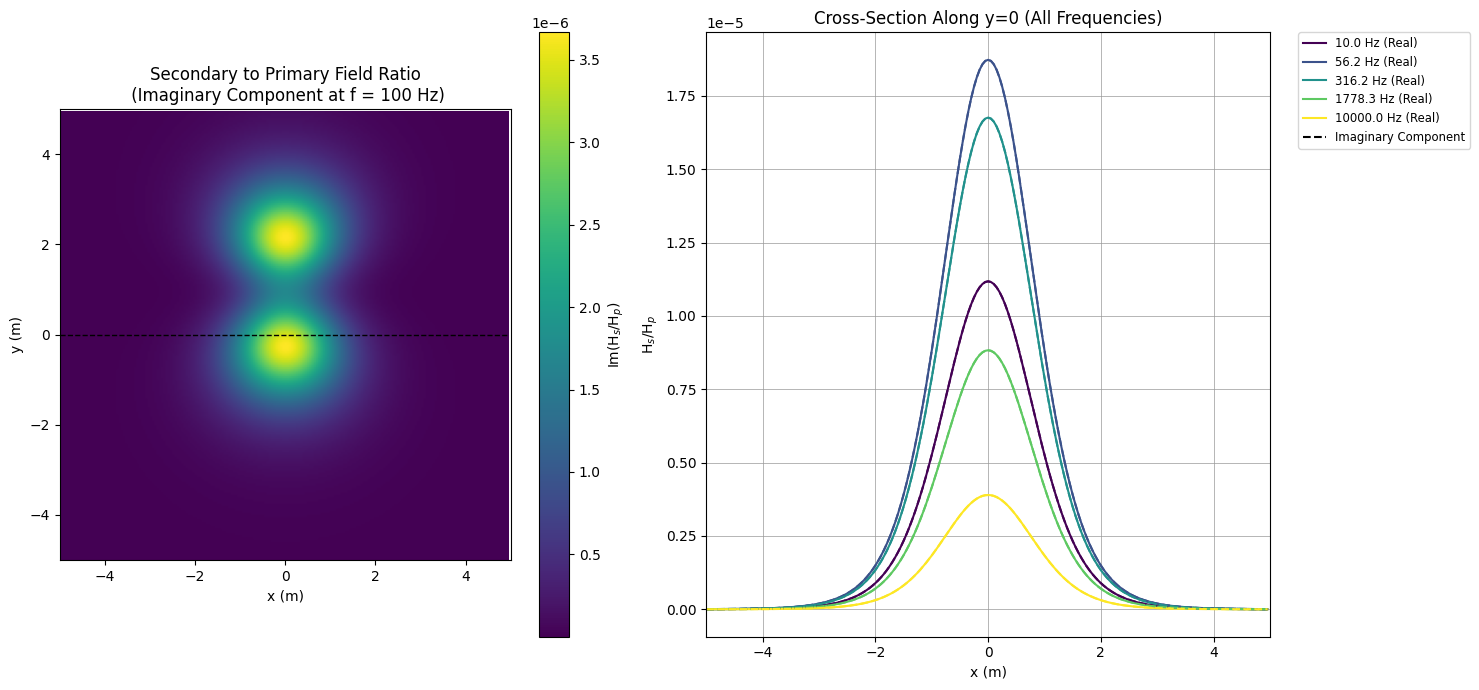

In [13]:
f = np.logspace(1,4,5)
dx = 0.05
xmin = -5
xmax = 5

response = forward_simulation.fem_pipe(
    sigma=1.0e4,
    mu=4*np.pi*10**(-7),
    xc=-1.0,
    yc=0.0,
    zc=2.0,
    dincl=0.0,
    ddecl=0.0,
    dipole_dist=1.0,
    sensor_ht=0.05,
    f=f,
    xmin=xmin,
    xmax=xmax,
    dx=dx,
    N_loops=100,
    length=1.5,
    rad=0.5,
)

xp = np.arange(xmin, xmax, dx)
yp = np.arange(xmin, xmax, dx)

# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot left panel - keep the imshow of the first frequency
imag_response = np.real(response[:, :, 0])
vminI = imag_response.min()
vmaxI = imag_response.max()
ax[0].plot(np.r_[xp.min(), xp.max()], np.zeros(2), "k--", lw=1)
im = ax[0].imshow(
    imag_response,
    extent=[xp.min(), xp.max(), yp.min(), yp.max()],
    vmin=vminI,
    vmax=vmaxI,
)
clb = plt.colorbar(im, ax=ax[0])
ax[0].set_xlim(np.r_[xmin, xmax])
ax[0].set_ylim(np.r_[xmin, xmax])
ax[0].set_xlabel("x (m)")
ax[0].set_ylabel("y (m)")
ax[0].set_title("Secondary to Primary Field Ratio\n (Imaginary Component at f = 100 Hz)")
clb.set_label("Im(H$_s$/H$_p$)")

# For right panel - overlay plots for each frequency
kx = int(np.ceil(xp.size / 2.0))
colors = plt.cm.viridis(np.linspace(0, 1, len(f)))

# Plot real component
for i, freq in enumerate(f):
    real_response = np.imag(response[:, :, i])
    ax[1].plot(xp[:], real_response[kx, :], '-', color=colors[i], 
               label=f"{freq:.1f} Hz (Real)")

# Plot imaginary component for each frequency
for i, freq in enumerate(f):
    imag_response = np.imag(response[:, :, i])
    ax[1].plot(xp[:], imag_response[kx, :], '--', color=colors[i])

ax[1].set_xlabel("x (m)")
ax[1].set_ylabel("H$_s$/H$_p$")
ax[1].set_title("Cross-Section Along y=0 (All Frequencies)")
ax[1].grid(True, which="both", color="0.6", linestyle="-", linewidth="0.5")
ax[1].set_xlim(np.r_[xmin, xmax])

# Create a custom legend that combines real and imaginary
custom_lines = []
custom_labels = []
for i, freq in enumerate(f):  # Show subset of frequencies in legend
    custom_lines.append(plt.Line2D([0], [0], color=colors[i], linestyle='-'))
    custom_labels.append(f"{freq:.1f} Hz (Real)")
    
# Add one example of dashed line to show imaginary
custom_lines.append(plt.Line2D([0], [0], color='black', linestyle='--'))
custom_labels.append("Imaginary Component")

# Place legend outside the plot
ax[1].legend(custom_lines, custom_labels, loc='upper left', bbox_to_anchor=(1.05, 1), 
             borderaxespad=0., fontsize='small')

plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Make room for the legend
plt.show()

### Generate a sample dataset with randomized parameters

In [3]:
# number of samples
n_sims = 100

# survey space
x_min = -4 # m
x_max = 4 # m
dx = 0.05 # m
freqs = np.logspace(3, 5, 8) # Hz

# mechanical constants
dipole_dist = 0.9 # spacing between coils (m)
sensor_ht = 0.05 # height of the sensor above ground (m)

# random parameters
conductivity = np.random.uniform(1e4, 1e6, n_sims)
permeability = 4*np.pi*1e-7 # free space permeability
xc = np.random.uniform(x_min, x_max, n_sims)
yc = np.random.uniform(x_min, x_max, n_sims)
zc = np.random.uniform(0.5, 2, n_sims)
dincl = np.random.uniform(0, 90, n_sims) # inclination angle in degrees
ddecl = np.random.uniform(0, 360, n_sims) # declination angle in degrees
length = np.random.uniform(0.05, 0.2, n_sims)
rad = np.random.uniform(1/6, 1, n_sims) * length

# precision of simulation
n_loops = 100

response_list = []
for i in range(n_sims):
    # run simulation for each set of parameters
    response = forward_simulation.fem_pipe(
        conductivity[i],
        permeability,
        xc[i],
        yc[i],
        zc[i],
        dincl[i],
        ddecl[i],
        dipole_dist,
        sensor_ht,
        freqs,
        x_min,
        x_max,
        dx,
        n_loops,
        length[i],
        rad[i]
    )
    response_list.append(response)
    print(f"Simulation {i+1}/{n_sims} completed.")

Simulation 1/100 completed.
Simulation 2/100 completed.
Simulation 3/100 completed.
Simulation 4/100 completed.
Simulation 5/100 completed.
Simulation 6/100 completed.
Simulation 7/100 completed.
Simulation 8/100 completed.
Simulation 9/100 completed.
Simulation 10/100 completed.
Simulation 11/100 completed.
Simulation 12/100 completed.
Simulation 13/100 completed.
Simulation 14/100 completed.
Simulation 15/100 completed.
Simulation 16/100 completed.
Simulation 17/100 completed.
Simulation 18/100 completed.
Simulation 19/100 completed.
Simulation 20/100 completed.
Simulation 21/100 completed.
Simulation 22/100 completed.
Simulation 23/100 completed.
Simulation 24/100 completed.
Simulation 25/100 completed.
Simulation 26/100 completed.
Simulation 27/100 completed.
Simulation 28/100 completed.
Simulation 29/100 completed.
Simulation 30/100 completed.
Simulation 31/100 completed.
Simulation 32/100 completed.
Simulation 33/100 completed.
Simulation 34/100 completed.
Simulation 35/100 compl